# 경사하강법 구현

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# n = 20
# x = np.random.randn(n)
# y = 3 * x + 4 + np.random.randn(n)

# num_epoch = 10
# lr = 1.3 # 0.1 ~ 2.0 learning rate
# w = np.random.uniform()
# b = np.random.uniform()
# for epoch in range(num_epoch): # 경사하강법 구현
#     y_pred = w*x + b
#     error = np.abs(y_pred - y).mean()
#     print(f"{epoch:2} w = {w:.6f}, b = {b:.6f}, error = {error:.6f}")

#     w = w - lr*((y_pred - y)* x).mean()
#     b = b - lr*((y_pred - y)).mean()

# 남여 키-몸무게 예측

1.6666666666666667
-218.33333333333331
1.0
-103


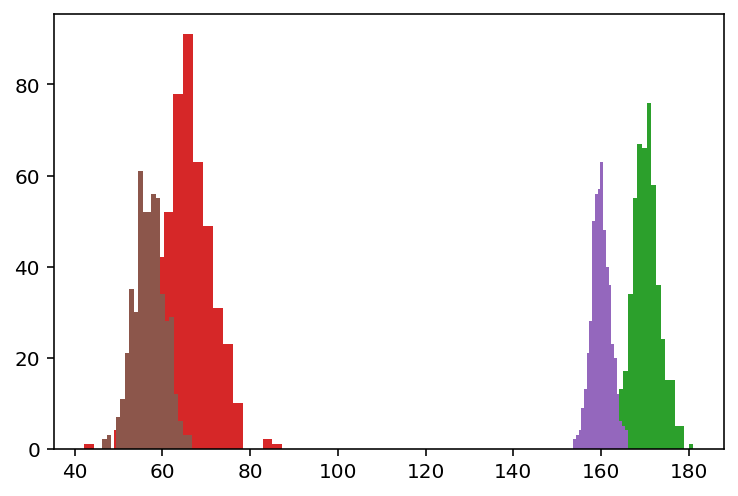

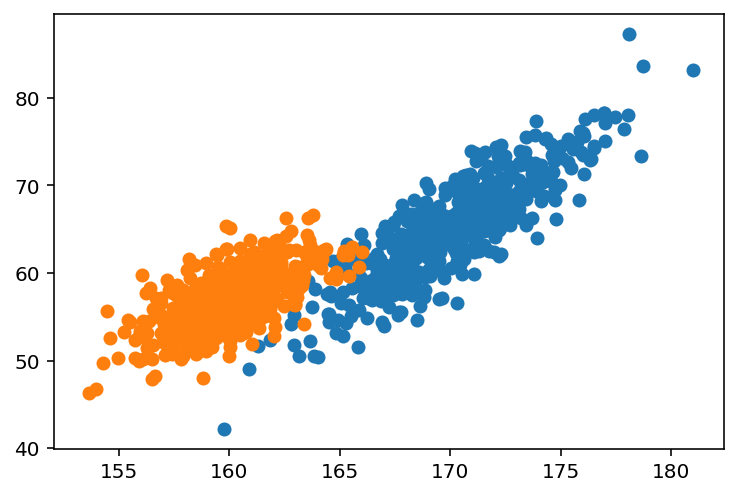

In [559]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# data generation
# 키, 몸무게
n = 500
x1 = np.random.randn(n)*3.0 + 170
x2 = np.random.randn(n)*2.0 + 160

plt.hist(x1, bins=20)
plt.hist(x2, bins=20)
a1 = (10./6.) ; print(a1)
b1 = (60-10*167/6.); print(b1)
a2 = 1.0 ; print(a2)
b2 = 62 - 165 ; print(b2)

y1 = a1*x1 + b1 + np.random.randn(n)*3.0
y2 = a2*x2 + b2 + np.random.randn(n)*2.5
plt.hist(x1, bins=20)
plt.hist(y1, bins=20)
plt.hist(x2, bins=20)
plt.hist(y2, bins=20)
plt.show()
plt.scatter(x1,y1)
# plt.show()
plt.scatter(x2,y2)
plt.show()

0.7254482042680503


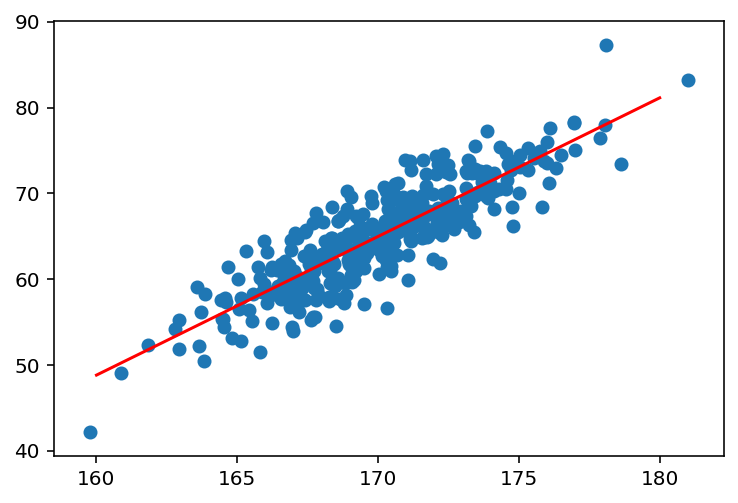

In [560]:
from sklearn.model_selection import train_test_split
np.random.seed(999)
X_train, X_test, y_train, y_test = train_test_split(x1,y1) # 75%
# 남성 키 --> 몸무게 예측: M1
from sklearn.linear_model import LinearRegression
M1 = LinearRegression() # (1) 모델 구조 선택
M1.fit(X_train.reshape(-1, 1),y_train) # (2) 학습 수행
print(M1.score(X_test.reshape(-1, 1), y_test)) # (3) 모델 사용후 채점 R-square

w1, b1 = M1.coef_, M1.intercept_
xs = np.linspace(160,180,2) # fitting 라인 그리기
plt.plot(xs, w1*xs + b1, c='r')
plt.scatter(X_train,y_train)

In [528]:
z = np.arange(10)
# np.random.seed(999)
a,b = train_test_split(z, test_size=0.3, random_state=999) # 훈련용은 70%
a,b

(array([4, 3, 7, 9, 1, 5, 0]), array([6, 2, 8]))

In [561]:
np.random.seed(999)
X_train, X_test, y_train, y_test = train_test_split(x2,y2) # 75%
M2 = LinearRegression() # (1) 모델 구조 선택
M2.fit(X_train.reshape(-1, 1),y_train) # (2) 학습 수행
print(M2.score(X_test.reshape(-1, 1), y_test)) # (3) 모델 사용후 채점 R-square


0.48088169010180615


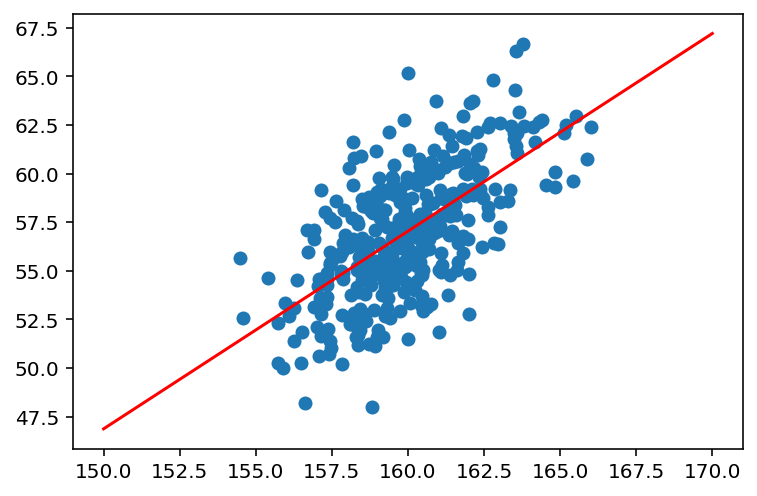

In [562]:
w1, b1 = M2.coef_, M2.intercept_
xs = np.linspace(150,170,2) # fitting 라인 그리기
plt.plot(xs, w1*xs + b1, c='r')
# plt.scatter(x1,y1)
plt.scatter(X_train,y_train)

In [563]:
x = np.hstack((x1,x2))
y = np.hstack((y1,y2))

np.random.seed(999)
X_train, X_test, y_train, y_test = train_test_split(x,y) # 75%
M3 = LinearRegression() # (1) 모델 구조 선택
M3.fit(X_train.reshape(-1, 1),y_train) # (2) 학습 수행
print(M3.score(X_test.reshape(-1, 1), y_test)) # (3) 모델 사용후 채점 R-square


0.7014272934480272


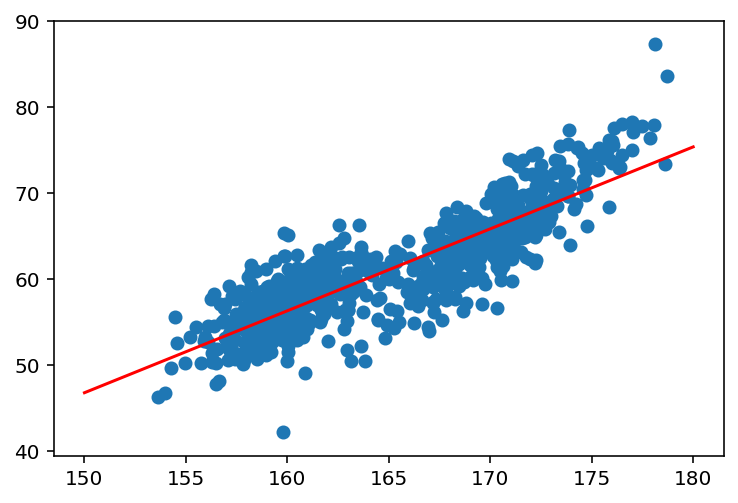

In [564]:
w1, b1 = M3.coef_, M3.intercept_
xs = np.linspace(150,180,2) # fitting 라인 그리기
plt.plot(xs, w1*xs + b1, c='r')
# plt.scatter(x1,y1)
plt.scatter(X_train, y_train)

# 성별을 고려한 성능 개선

In [622]:
z= np.vstack((x, y)) # 수직으로 합치기
P = z.T
# 남성 0, 여성 1
s = n * [1] + n * [0]
df =pd.DataFrame(P, columns=[['height', 'weight']])
df['sex'] = s

y = df[['weight']]   # 데이터프레임을 편리하게 사용
X = df[["height", "sex"]]
# y = df.values[:,1]  # ndarray로 직접 처리, 속도가 빠르다
# X = df.values[:,(0,2)]
np.random.seed(999)
X_train, X_test, y_train, y_test = train_test_split(X,y) # 75%
M4 = LinearRegression() # (1) 모델 구조 선택
M4.fit(X_train,y_train) # (2) 학습 수행
print(M4.score(X_test, y_test)) # (3) 모델 사용후 채점 R-square


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1000 and the array at index 1 has size 1

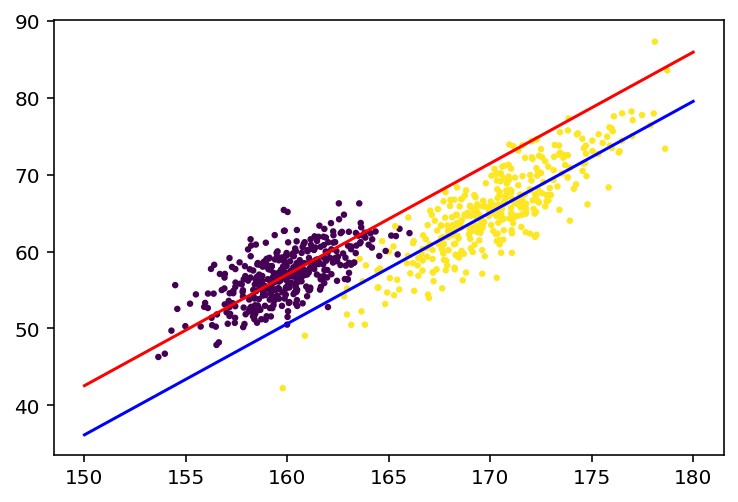

In [566]:
a1, a2, b = M4.coef_[0][0], M4.coef_[0][1], M4.intercept_
xs = np.linspace(150,180,2) # fitting 라인 그리기
plt.plot(xs, a1*xs + a2*1 + b, c='b') # 남성은 성별 컬럼이 0
plt.plot(xs, a1*xs + a2*0 + b, c='r') # 여성은 1
plt.scatter(X_train[["height"]], y_train, c =X_train[["sex"]] , s=5)

In [567]:
a1, a2, b

(1.4467648437903555, -6.399596437083362, array([-174.45519338]))

# 이진분류 문제  키, 몸무게 --> 성별

In [571]:
X = df[['height', 'weight']]
y = df[['sex']]

In [574]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
from sklearn.linear_model import SGDClassifier
np.random.seed(999)
X_train, X_test, y_train, y_test = train_test_split(X_sc,y) # 75%
M5 = SGDClassifier() # (1) 모델 구조 선택
M5.fit(X_train,y_train) # (2) 학습 수행
print(M5.score(X_test, y_test)) # (3) 모델 사용후 채점 분류: accuracy

0.976


/Users/hwa-kim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [589]:
a1, a2, b = M5.coef_[0][0], M5.coef_[0][1], M5.intercept_
a1, a2, b

(11.730673585639948, -3.481036584938639, array([-0.25016212]))

In [590]:
m1, m2 = sc.mean_[0], sc.mean_[1]
s1, s2 = sc.scale_[0], sc.scale_[1]

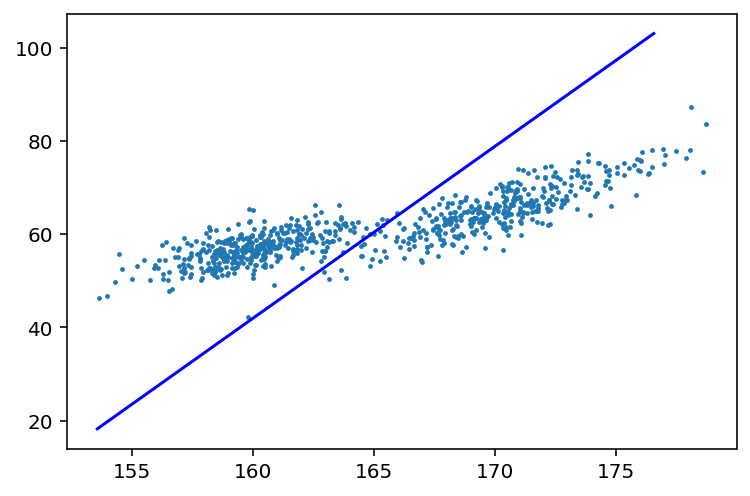

In [598]:
a1, a2, b = M5.coef_[0][0], M5.coef_[0][1], M5.intercept_
xs = np.linspace(-2,2,2)
plt.scatter(X_train[:,0]*s1+m1,X_train[:,1]*s2+m2, s=2)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs*s1+m1, ys*s2+m2, c='b')

In [610]:
X_train.shape, X_test.shape

((750, 2), (250, 2))

In [609]:
y_pred = M5.predict(X_test) # (3)  분류 예측에 적용 inference
y_pred[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0])